<a href="https://colab.research.google.com/github/fhsmartins/MBA/blob/main/Aula03/Pratica_Aula2_MedidasLocalizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SCC - ICMC - USP
#**MBA EM INTELIGENCIA ARTIFICIAL E BIGDATA**
## **CURSO 2 - CD, AM E DM**
## **PROFA. ROSELI AP. FRANCELIN ROMERO**
---

# **Exemplo 1 - Exploração e visualização de dados**
##**OBJETIVO**
# Trabalhar com Dados unidimensionais, média, variância, histogramas e boxplot


Considerando dados de duas cidades diferentes fornecendo as temperaturas máximas (celsius) durante diferente dias do ano.
Os dados foram disponibilizados nos arquivos "cidade_1.txt" e "cidade_2.txt".

As leituras estão em ordem cronológica, porém, o sensor da cidade 1 falhou em alguns dias. Nesses casos, a leitura foi substituida pelo o caracter "?".

Pede-se: Determinar a cidade que possui o maior numero de dias quentes (temperatura maior do que 25).

### Questão 1
- Substitua os valores faltantes pela média das leituras do dia anterior e do dia seguinte.

In [1]:
import numpy as np
import pandas as pd

In [7]:
#leitura do arquivo cidade 1
with open("sample_data/cidade_1.txt") as f:
   cidades_1_lines = f.readlines()
# substituição dos dados faltantes
for i in range(0,len(cidades_1_lines)):
  if(cidades_1_lines[i] == "?\n"):
    cidades_1_lines[i] = (float(cidades_1_lines[i-1]) + float(cidades_1_lines[i+1]))/2
cidade_1 = np.array([float(x) for x in cidades_1_lines])

In [ ]:
cidade_1

array([ 9.40443636, 24.28496134, 28.21028839,  4.46303596, 25.76486591,
       24.6008589 , 20.10595572, 25.22854356,  6.41185417, 22.41234732,
       24.50023634, 32.99335839, 21.30614824, 23.82439325, 21.18189167,
       24.24971128,  8.52847002, 29.93148478, 23.93790519, 23.54303319,
        4.84833974,  8.0547211 , 29.80266309, 32.27901596, 33.39245524,
       28.23113104, 27.04935345, 27.8272214 , 27.39730606, 22.02129573,
       29.81778734, 34.08392427, 23.11317641, 25.30513552, 25.16840982,
       25.72384526, 27.12082499, 26.2242164 , 25.32760781, 33.75601185,
       32.03821015, 22.5240441 , 26.21237879,  8.0009636 , 28.97701738,
       32.88344544, 21.6844318 , 30.06975763, 22.9948009 , 21.23154522,
        8.47501831, 22.69606903, 28.68902162, 29.91760324, 21.62994871,
       22.31306263, 24.29972048, 32.53453   , 28.27664646, 27.32870836,
       26.61644778, 36.74390819, 34.63947407, 31.75211273, -4.36950465,
       24.84273665, 22.48455863, 30.77423558,  8.17385942, 23.42

In [9]:
#leitura do arquivo cidade 2
with open("sample_data/cidade_2.txt") as f:
   cidades_2_lines = f.readlines()
cidade_2 = np.array([float(x) for x in cidades_2_lines])

In [10]:
cidade_1
cidade_2


array([35.02320929, 21.88552285, 37.28387273, 20.855662  , 22.79302821,
       37.32789265, 21.0655991 , 24.75956562, 23.3144785 , 36.90765118,
       22.37607835, 36.83783527, 20.41809354, 23.37860785, 37.34661853,
       22.15979184, 37.86353702, 24.28617558, 36.41692688, 24.42056383,
       21.62327396, 23.11988689, 23.36477995, 35.29268965, 20.37390563,
       22.83113387, 35.03730588, 21.08300386, 24.84035434, 22.7322318 ,
       20.0958133 , 35.36089668, 37.64313233, 24.25528377, 22.49769159,
       37.87205706, 24.01609398, 24.54939818, 37.53399636, 36.04455193,
       35.72852398, 20.70080331, 21.44511659, 23.79069547, 23.6127424 ,
       35.19063353, 20.80406649, 20.04010618, 22.46209386, 35.68647637,
       21.43751564, 21.07800742, 24.31302031, 23.2206032 , 35.93998346,
       22.56254128, 22.1089602 , 24.46951182, 37.45327715, 21.391841  ,
       37.1467366 , 21.60396591, 22.48319564, 22.39088922, 23.43161517,
       37.95059385, 20.34252959, 21.36898654, 24.53097794, 21.85

### Questão 2.
Consideramos um dia como quente caso sua temperatura máxima tenha sido maior ou igual 25 graus celsius.

1. Calcule a média de temperatura no ano para cada cidade.

2. Demonstre visualmente porque essa métrica não é uma boa forma de estimarmos qual cidade teve mais dias quente.

   - Dica: Transforme os arrays de cada cidade em estruturas do tipo `DataFrame` da biblioteca **pandas** e utilize as funções de histograma e/ou boxplot.

In [11]:
data = pd.DataFrame(
    {"Cidade 1": cidade_1,
     "Cidade 2": cidade_2
     }
)

In [12]:
# Calculo da média da cidade 1
print("A média da cidade 1:", data["Cidade 1"].mean())
# Calculo da média da cidade 2
print("A média da cidade 2:", data["Cidade 2"].mean())


A média da cidade 1: 24.012638726623994
A média da cidade 2: 27.82079587783114


array([[<Axes: title={'center': 'Cidade 1'}>,
        <Axes: title={'center': 'Cidade 2'}>]], dtype=object)

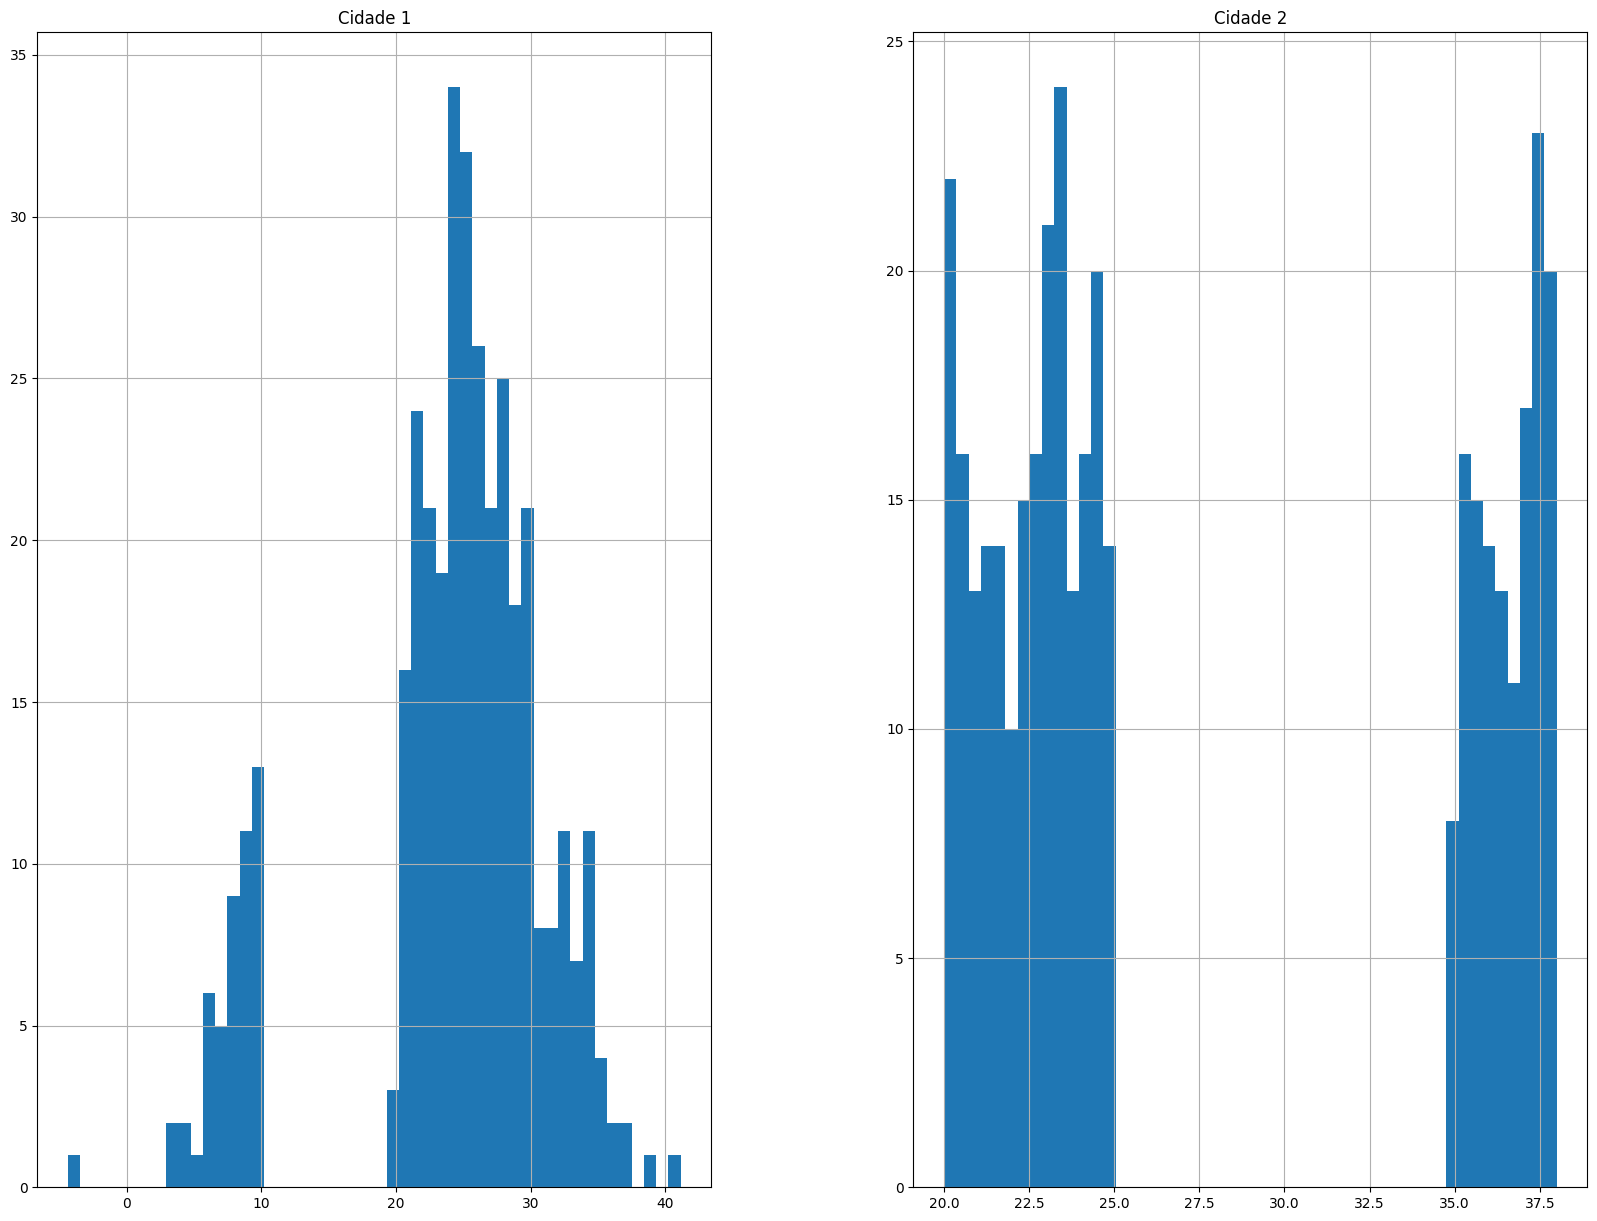

In [13]:
#Construindo o histograma
data.hist(bins=50, figsize=(20,15))

<Axes: ylabel='Count'>

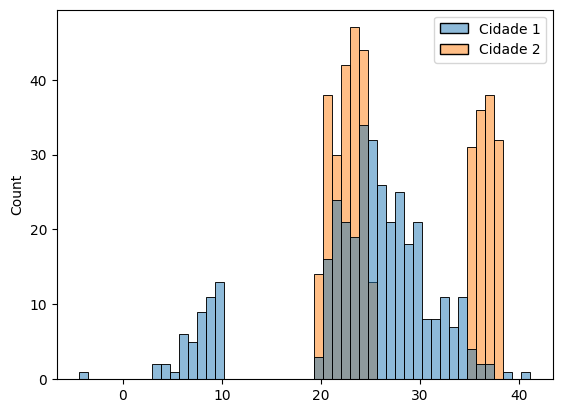

In [14]:

import seaborn as sns
sns.histplot(data, bins= 50)

A cidade 2 tem a maior média, mas será que ela teve o maior numero de dias quentes. Vamos checar isso visualmente usando o BOXPLOT pois pelo histograma não dá para se ter certeza.

<Axes: >

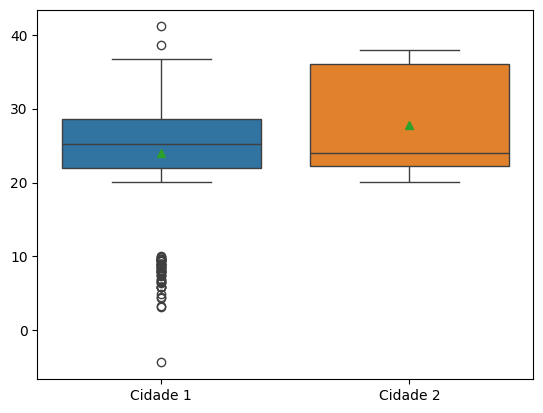

In [15]:
#montando o boxplot
sns.boxplot(data, showmeans = True)

Apesar da média da cidade 2 ser maior, percebemos que são apenas alguns valores que puxam seu valor para cima. Pelo bloxplot, percebemos também que a cidade 1 teve uma variância menor do que a cidade 2.



---

### Questão 3.
1. Calcule o número de dias quentes em cada cidade.
- Dica: Use a função `argwhere` da biblioteca **numpy**.

In [16]:
#numero de dias quentes em cada cidade
dias_quentes_1 = np.argwhere(cidade_1>25)
print("O numero de dias quentes na cidade 1:", len(dias_quentes_1))
dias_quentes_2 = np.argwhere(cidade_2>25)
print("O numero de dias quentes na cidade 2:", len(dias_quentes_2))

O numero de dias quentes na cidade 1: 192
O numero de dias quentes na cidade 2: 137
